In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
df = pd.read_csv("./census.csv", skipinitialspace=True)
display(df.head(n=5))

# simple statistics
n_records = df.shape[0]
n_greater_50k = df[df.income==">50K"].shape[0]
n_at_most_50k = df[df.income=="<=50K"].shape[0]
greater_percent = n_at_most_50k/n_records*100

print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 75.21560302507629%


HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education_level, dtype: int64
9.0     14783
10.0     9899
13.0     7570
14.0     2514
11.0     1959
7.0      1619
12.0     1507
6.0      1223
4.0       823
15.0      785
5.0       676
8.0       577
16.0      544
3.0       449
2.0       222
1.0        72
Name: education-num, dtype: int64


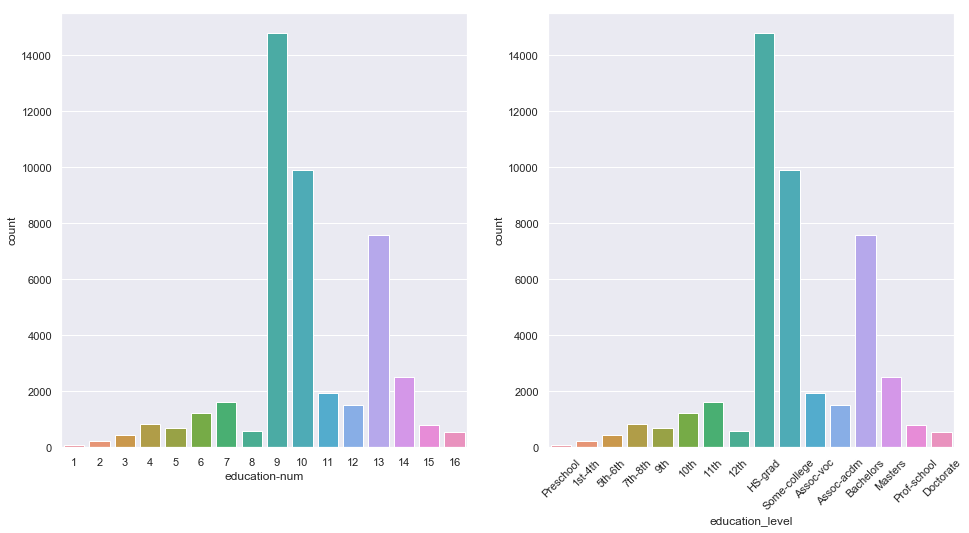

In [2]:
# Check for redundant features
print(df['education_level'].value_counts())
print(df['education-num'].value_counts())

# Plot histogram of education-num, education_vel
fig = plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
sns.countplot(df['education-num'].astype(int))
fig.add_subplot(1, 2, 2)
sns.countplot(df['education_level'],
              order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
              '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 
              'Assoc-acdm', 'Bachelors','Masters', 'Prof-school', 'Doctorate'])
plt.xticks(rotation=45)
plt.show()

Total number of countries: 41
Percentage of individuals from the United States: 91.30953960461721


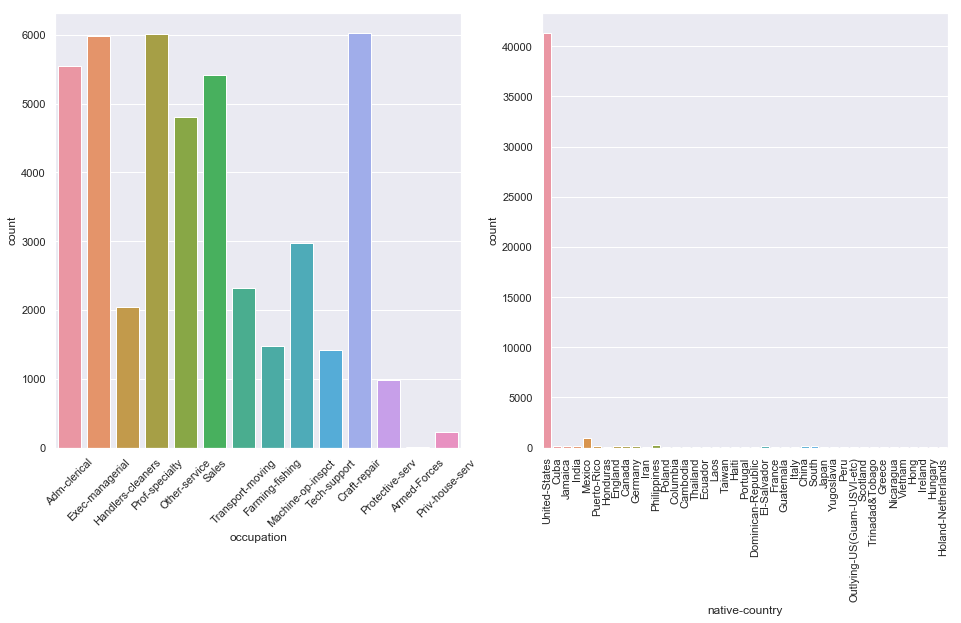

In [3]:
# Check for redundant categories
n_country = df['native-country'].value_counts().shape[0]
n_us = df[df["native-country"]=="United-States"].shape[0]
us_percent = n_us/n_records*100
print("Total number of countries: {}".format(n_country))
print("Percentage of individuals from the United States: {}".format(us_percent))

# Plot histogram of occupation, native-country
fig = plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
sns.countplot(df['occupation'])
plt.xticks(rotation=45)
fig.add_subplot(1, 2, 2)
sns.countplot(df['native-country'])
plt.xticks(rotation=90)
plt.show()

In [4]:
# check for missing data
print(df.apply(lambda x: sum(x.isnull()), axis=0))

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


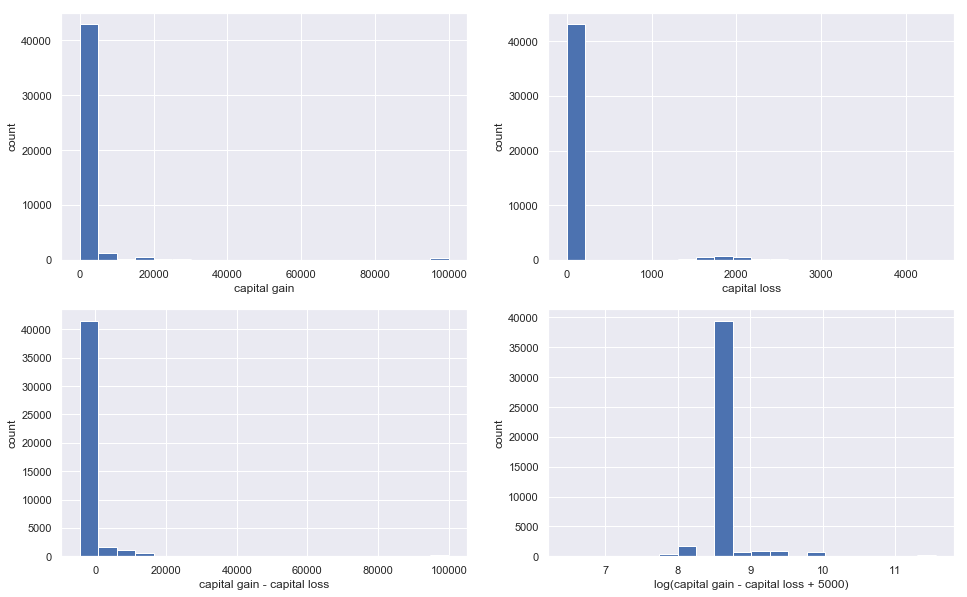

In [5]:
# check for relations between two features
df['capital-diff'] = df['capital-gain'] - df['capital-loss'] 

fig = plt.figure(figsize = (16,10))
fig.add_subplot(2, 2, 1)
df['capital-gain'].hist(bins=20)
plt.xlabel("capital gain")
plt.ylabel("count")
fig.add_subplot(2, 2, 2)
df['capital-loss'].hist(bins=20)
plt.xlabel("capital loss")
plt.ylabel("count")
fig.add_subplot(2, 2, 3)
df['capital-diff'].hist(bins=20)
plt.xlabel("capital gain - capital loss")
plt.ylabel("count")
fig.add_subplot(2, 2, 4)
df['capital-diff'].apply(lambda x: np.log(x + 5000)).hist(bins=20)
plt.xlabel("log(capital gain - capital loss + 5000)")
plt.ylabel("count")
plt.show()

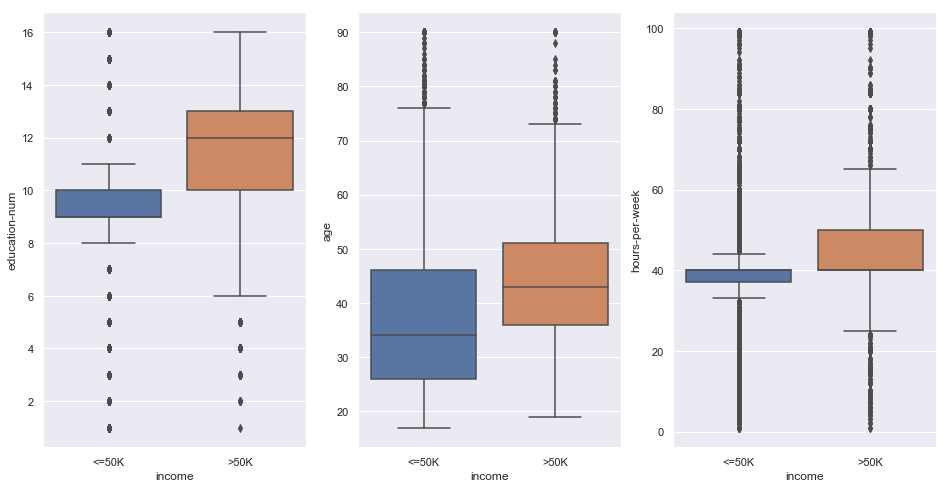

In [6]:
# plot income vs. numerical features
fig = plt.figure(figsize = (16,8))
fig.add_subplot(1, 3, 1)
sns.boxplot(x = 'income', y='education-num', data=df)
fig.add_subplot(1, 3, 2)
sns.boxplot(x = 'income', y='age', data=df)
fig.add_subplot(1, 3, 3)
sns.boxplot(x = 'income', y='hours-per-week', data=df)
plt.show()

Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64
Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried          4788
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64


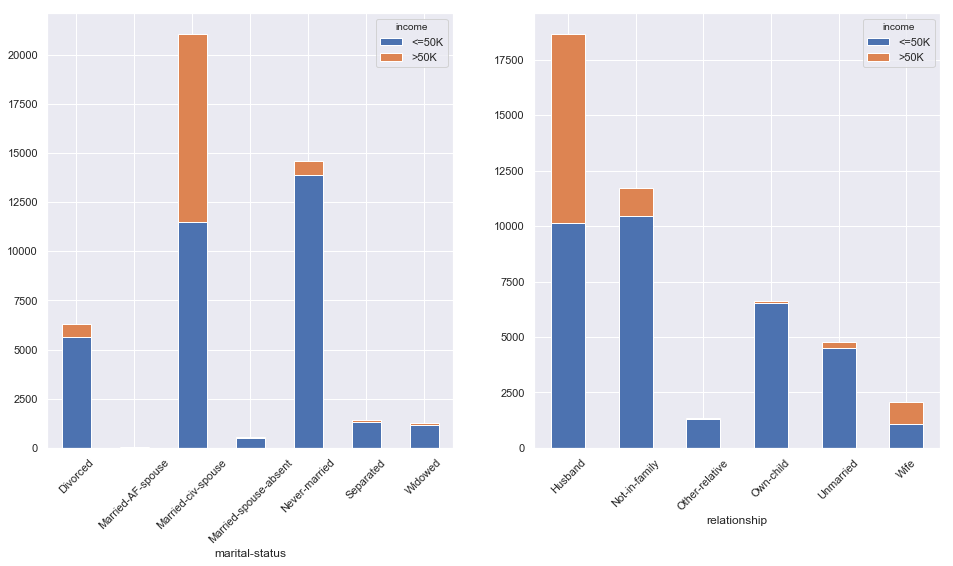

In [7]:
# check for relevant categories
print(df['marital-status'].value_counts())
print(df['relationship'].value_counts())

fig, ax = plt.subplots(1, 2, figsize=(16,8))
ct = pd.crosstab(df['marital-status'], df['income'])
ct.plot.bar(ax=ax[0], stacked=True, rot=45)

ct = pd.crosstab(df['relationship'], df['income'])
ct.plot.bar(ax=ax[1], stacked=True, rot=45)
plt.show()

In [8]:
# check the correlations between numerical features
ft_num = df.select_dtypes(include=['int64','float64']).columns.values
ft_cat = df.select_dtypes(exclude=['int64','float64']).columns.values

df['income_binary'] = df['income'].map(lambda x: 1 if x == '>50K' else 0)
corr = df[np.append(ft_num, 'income_binary')].corr()
cm = sns.light_palette("blue", as_cmap=True)
display(corr.style.background_gradient(cmap=cm))

,age,education-num,capital-gain,capital-loss,hours-per-week,capital-diff,income_binary
age,1,0.037623,0.0796832,0.0593506,0.101992,0.0762388,0.23704
education-num,0.037623,1,0.126907,0.0817113,0.146206,0.12211,0.3328
capital-gain,0.0796832,0.126907,1,-0.0321023,0.0838804,0.998554,0.221034
capital-loss,0.0593506,0.0817113,-0.0321023,1,0.0541949,-0.0857773,0.148687
hours-per-week,0.101992,0.146206,0.0838804,0.0541949,1,0.0806999,0.227199
capital-diff,0.0762388,0.12211,0.998554,-0.0857773,0.0806999,1,0.212337
income_binary,0.23704,0.3328,0.221034,0.148687,0.227199,0.212337,1


<Figure size 1440x432 with 0 Axes>

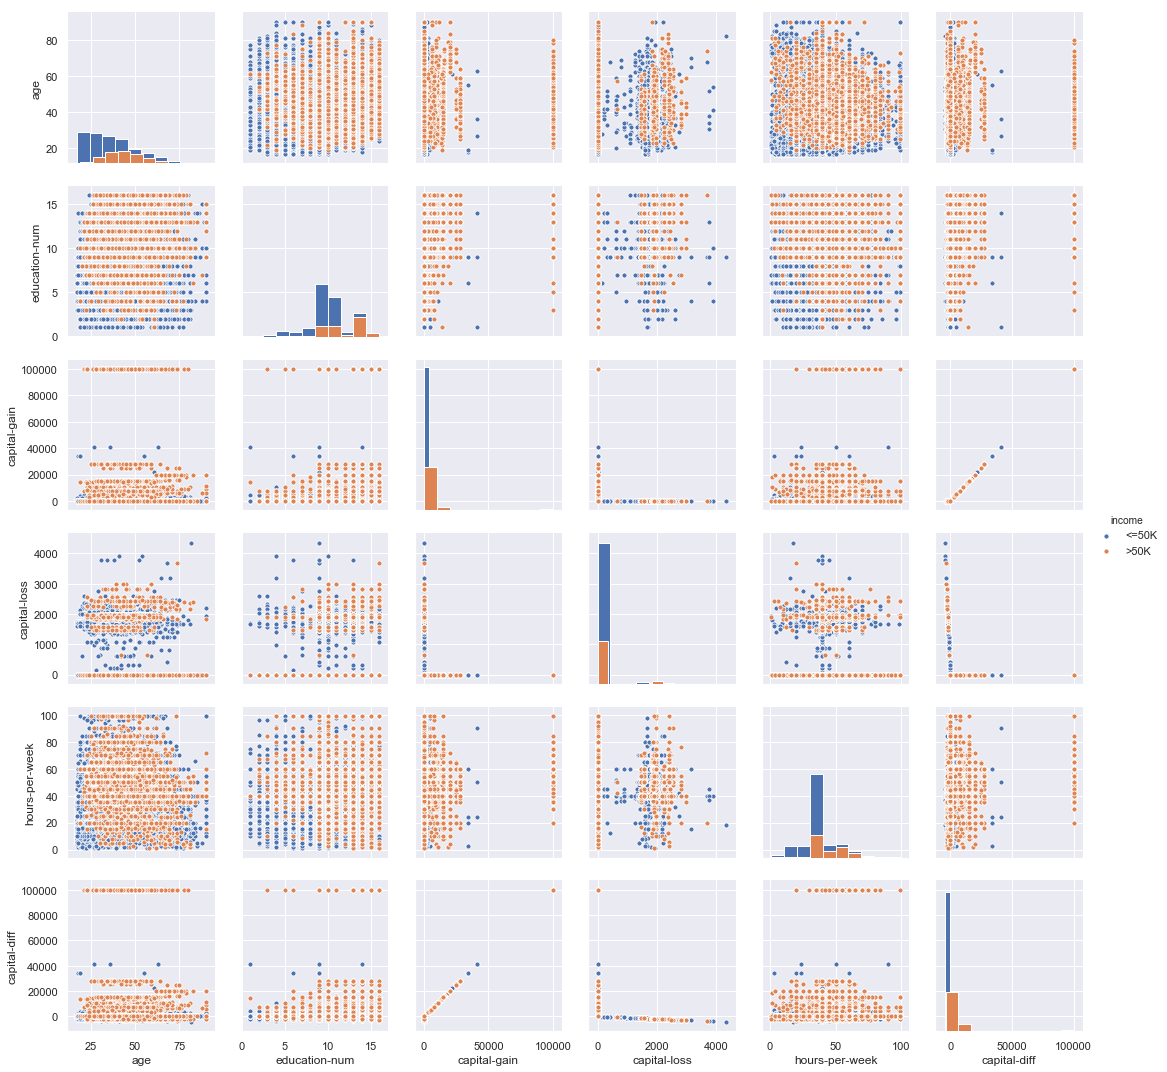

In [9]:
# check for linear pattern between any two numerical features
fig = plt.figure(figsize = (20,6))
sns.pairplot(df[np.append(ft_num, 'income')], diag_kind = 'hist', hue='income', plot_kws={"s": 25})
plt.show()